In [1]:
import pandas as pd 
import sqlite3

In [2]:
con = sqlite3.connect("db.sqlite3")

In [83]:
query_to_fetch = "select DetectedState ,Statecode, count(gender) from model_coviddata group by DetectedState; "

In [84]:
df=pd.read_sql_query(query_to_fetch,con)

In [87]:
df.columns = ['DetectedState','Statecode','no_people']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [88]:
df

,DetectedState,Statecode,no_people,PercentageofPeople
0,Andaman and Nicobar Islands,AN,18,0.166374
1,Andhra Pradesh,AP,454,4.196321
2,Assam,AS,1,0.009243
3,Bihar,BR,181,1.672983
4,Chandigarh,CH,10,0.092430
5,Chhattisgarh,CT,1,0.009243
6,Delhi,DL,915,8.457344
7,Gujarat,GJ,1558,14.400592
8,Haryana,HR,46,0.425178
9,Himachal Pradesh,HP,1,0.009243


In [86]:
df['PercentageofPeople'] = (df['no_people']/sum(df['no_people'])) * 100  

In [36]:
df=df.set_index('Statecode')

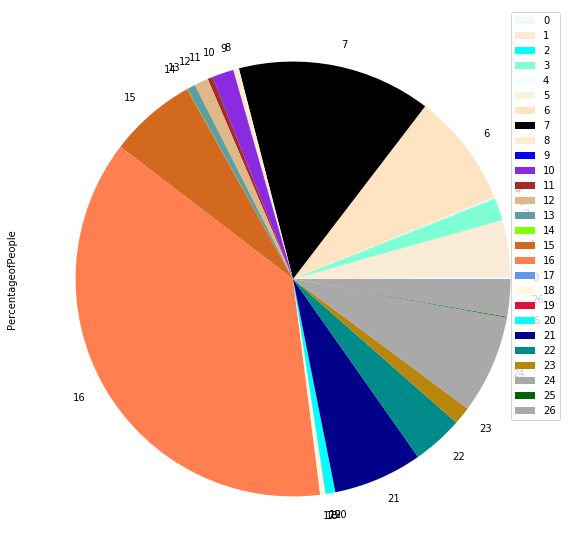

In [65]:
df.plot(kind='pie',y='PercentageofPeople',figsize=(20,10),colors=mcolors.CSS4_COLORS)


In [ ]:
import seaborn as sns 


In [ ]:
sns.catplot(kind='pie',data=df)

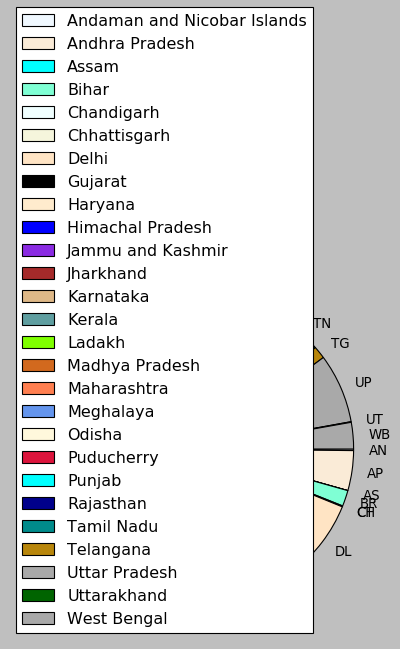

In [89]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
labels = list(df['Statecode'])
values = list(df['PercentageofPeople'])

plt.pie(values, colors=mcolors.CSS4_COLORS, labels=labels ,counterclock=False )
plt.title('Population Density Index')
plt.style.use('classic')
plt.legend(df['DetectedState'],loc=3)
plt.show()

In [45]:
import matplotlib.pyplot as plt
 
values = df['PercentageofPeople']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['US', 'UK', 'India', 'Germany', 'Australia', 'South Korea']
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Population Density Index')
plt.show()

KeyError: 'Percentageofpeople'

In [54]:
df=df.reset_index()

In [72]:
plt.style.available

['Solarize_Light2',
 'ggplot',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'seaborn-paper',
 'seaborn',
 'classic',
 'seaborn-bright',
 'seaborn-pastel',
 'seaborn-ticks',
 'fivethirtyeight',
 'grayscale',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 '_classic_test',
 'seaborn-poster',
 'fast',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-dark']

In [90]:
df.set_index('Statecode')

,DetectedState,no_people,PercentageofPeople
Statecode,,,
AN,Andaman and Nicobar Islands,18,0.166374
AP,Andhra Pradesh,454,4.196321
AS,Assam,1,0.009243
BR,Bihar,181,1.672983
CH,Chandigarh,10,0.092430
CT,Chhattisgarh,1,0.009243
DL,Delhi,915,8.457344
GJ,Gujarat,1558,14.400592
HR,Haryana,46,0.425178


In [91]:
df.to_csv('Static/res3.csv')

In [92]:
df.to_json('Static/res3.json')